In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.signal import convolve2d
import warnings
import pickle 
from multiprocessing import Pool, cpu_count
from class_schelling import Schelling
from pollo import compute_metrics, parallel_compute_metrics
from run_all import compute_metrics as cm
from run_all import parallel_compute_metrics as pcm


In [26]:
warnings.filterwarnings("ignore")
cmap = ListedColormap(['blue', 'white', 'red'])
markers = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

In [27]:
T = np.arange(0.2, .9, 0.02)
P = np.arange(.02, .2, .04)

In [28]:
len(T), len(P)

(35, 5)

## Preliminary analysis of equilibria reached 

In [29]:
with open("/Users/mariamorandini/Desktop/schelling_oggetti.obj", 'rb') as file:
    schelling_objects = pickle.load(file)

In [30]:
with open("/Users/mariamorandini/Desktop/schelling_parameters.obj", 'rb') as file:
    schelling_parameters = pickle.load(file)

In [31]:
len(schelling_objects) 

3500

In [32]:
len(schelling_parameters)

5

In [33]:
schelling_parameters.keys()

dict_keys(['Models_energy', 'Models_bc_energy', 'Models_satisfaction_ratio', 'Models_density_unwanted', 'Models_segregation_coefficient'])

In [10]:
schelling_parameters['Models_energy'].shape

(35, 5, 20)

In [11]:
# unpacking
T = np.arange(0.2, .9, 0.02)
P = np.arange(.02, .2, .04)

N = np.arange(36000) # number of time steps
C = np.arange(20)   # number of channels 

Models = np.empty(( len(T), len(P), len(C)), dtype=object)

for i, t in enumerate(T): 
  for j, p in enumerate(P): 
    for k in C:
      Models[i, j, k]  = Schelling(30, t, p, .5, schelling_objects["t"+str(t)+"p"+str(p)+"c"+str(k)] ) # for the same parameters we give the same initial conditions

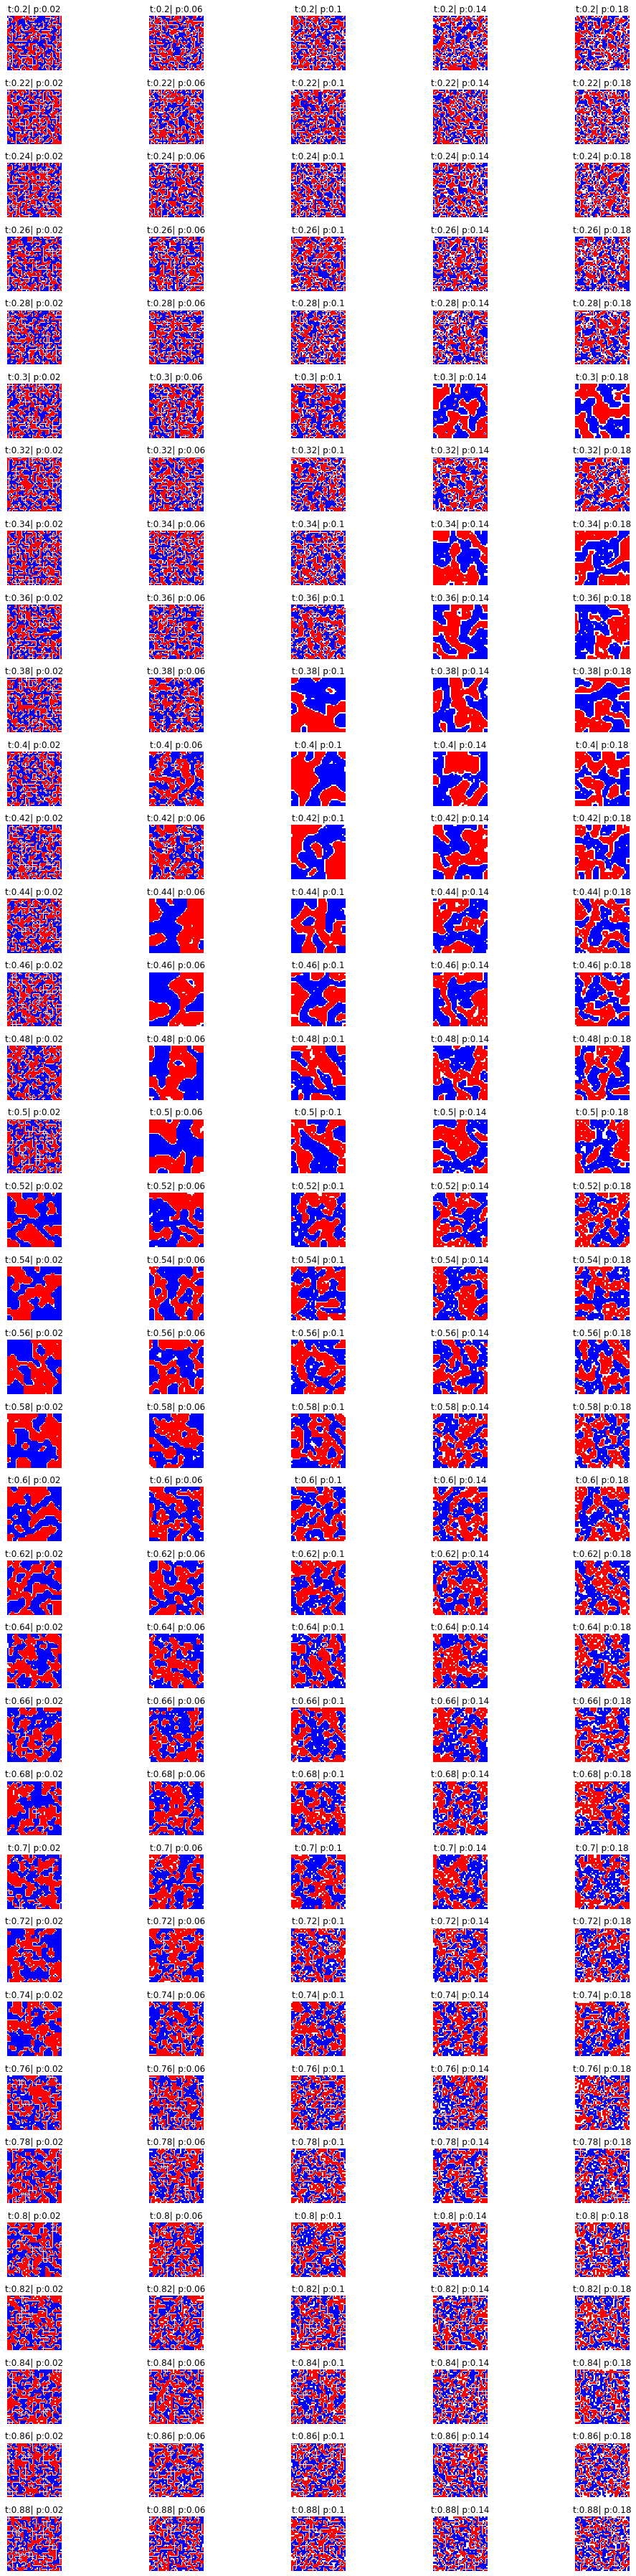

In [12]:
M = Models[:, :, 0]
fig, axs = plt.subplots(35, 5, figsize=(15, 50))
#fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, t in enumerate(T):
    for j, p in enumerate(P):
        ax = axs[i, j]
        ax.imshow(M[i, j].city, cmap)
        ax.set_title(f't:{round(t, 2)}| p:{round(p, 2)}')
        ax.axis('off')
        
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Phase diagram analysis 

Refering to the results processed in the _equilibria.ipynb_ file, we reload them and we proceeed to analyze the results obtained

Models_Es_remark:_ from here and how follows we will take the ennsemble average over the 20 channels we have simulated

In [34]:
M_sc = schelling_parameters["Models_segregation_coefficient"]
M_en = schelling_parameters["Models_energy"]

In [35]:
for key in schelling_parameters.keys():
    schelling_parameters[key] = np.mean(schelling_parameters[key], axis=2)

In [36]:
schelling_parameters.keys()

dict_keys(['Models_energy', 'Models_bc_energy', 'Models_satisfaction_ratio', 'Models_density_unwanted', 'Models_segregation_coefficient'])

## Tolerance vs Segregation 



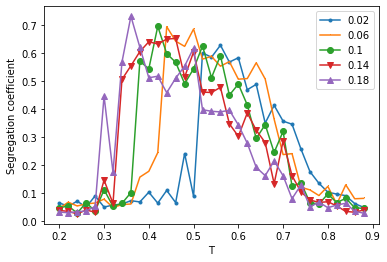

<Figure size 432x288 with 0 Axes>

In [38]:
plt.xlabel("T")
plt.ylabel("Segregation coefficient")
for i, p in enumerate(P):
    new = schelling_parameters["Models_segregation_coefficient"][:,i]
    plt.plot(T, new, label = round(p,2), marker = markers[i])
plt.legend()
plt.show()
plt.savefig('segregation.pdf')

## Density unwanted locations vs T

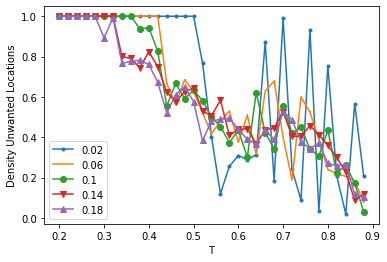

<Figure size 432x288 with 0 Axes>

In [19]:
plt.xlabel("T")
plt.ylabel("Density Unwanted Locations")
for i, p in enumerate(P):
    new = schelling_parameters["Models_density_unwanted"][:,i]
    plt.plot(T,new, label = round(p,2), marker = markers[i])
plt.legend()
plt.show()
plt.savefig('unwanted.pdf')

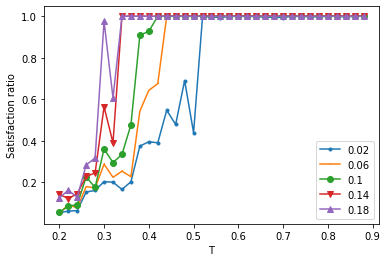

<Figure size 432x288 with 0 Axes>

In [20]:
plt.xlabel("T")
plt.ylabel("Satisfaction ratio")
for i, p in enumerate(P):
    new = schelling_parameters["Models_satisfaction_ratio"][:,i]
    plt.plot(T,new, label = round(p,2), marker = markers[i])
plt.legend()
plt.show()
plt.savefig('satsifaction.pdf')

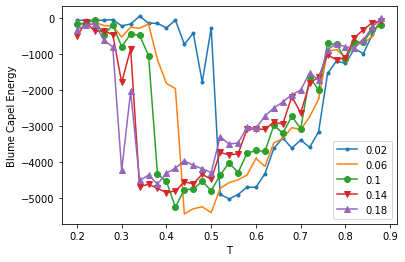

<Figure size 432x288 with 0 Axes>

In [21]:
plt.xlabel("T")
plt.ylabel("Blume Capel Energy")
for i, p in enumerate(P):
    new = schelling_parameters["Models_bc_energy"][:,i]
    plt.plot(T,new, label = round(p,2), marker = markers[i])
plt.legend()
plt.show()
plt.savefig('bc_energy.pdf')

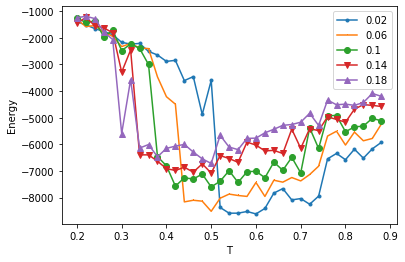

<Figure size 432x288 with 0 Axes>

In [22]:
plt.xlabel("T")
plt.ylabel("Energy")
for i, p in enumerate(P):
    new = schelling_parameters['Models_energy'][:,i]
    plt.plot(T,new, label = round(p,2), marker = markers[i])
plt.legend()
plt.show()
plt.savefig('energy.pdf')

## Analogue of specific Heat - Cs

Following the definition of gauvin et al. 

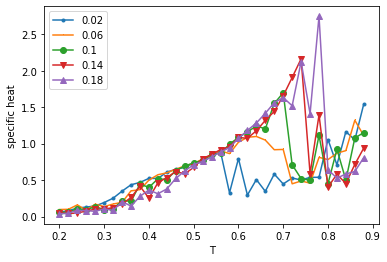

<Figure size 432x288 with 0 Axes>

In [23]:
Models_Cs = np.empty((len(T),len(P)))
for i, t in enumerate(T):
    for j, p in enumerate(P):

        Models_Cs[i, j] = (np.mean(M_sc[i, j] ) - np.mean(M_sc[i, j])**2)/t**2
        
plt.xlabel("T")
plt.ylabel("specific heat")
for i, p in enumerate(P):
    new = Models_Cs[:,i][::-1]
    plt.plot(T, new, label = round(p,2), marker = markers[i])
plt.legend()
plt.show()
plt.savefig('cs.pdf')

## Analogue of suceptibility - Xs

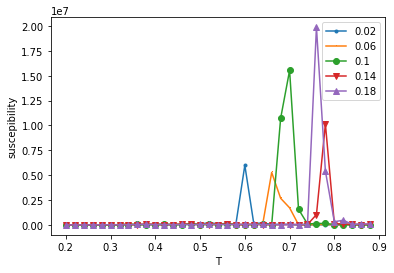

<Figure size 432x288 with 0 Axes>

In [24]:
Models_Xs = np.empty((len(T),len(P)))
for i, t in enumerate(T):
    for j, p in enumerate(P):
        Models_Xs[i, j] = (np.mean(M_en[i, j]**2) - np.mean(M_en[i, j])**2)/t**2

plt.xlabel("T")
plt.ylabel("suscepibility")
for i, p in enumerate(P):
    new = Models_Xs[:,i][::-1]
    plt.plot(T,new, label = round(p,2), marker = markers[i])
plt.legend()
plt.show()
plt.savefig('xs.pdf')